In [104]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Data Reading and Preprocessing

In [105]:
data = pd.read_csv("Mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [106]:
# Checking for null values
data.isna().any()

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool

In [107]:
# Checking for number of duplicated values
data.duplicated().sum()

22

In [108]:
# Dropping the instances of duplicate values except their first instance.
data.drop_duplicates(keep = "first",inplace = True)
data.count()

yummy             1431
convenient        1431
spicy             1431
fattening         1431
greasy            1431
fast              1431
cheap             1431
tasty             1431
expensive         1431
healthy           1431
disgusting        1431
Like              1431
Age               1431
VisitFrequency    1431
Gender            1431
dtype: int64

# Data Visualizations

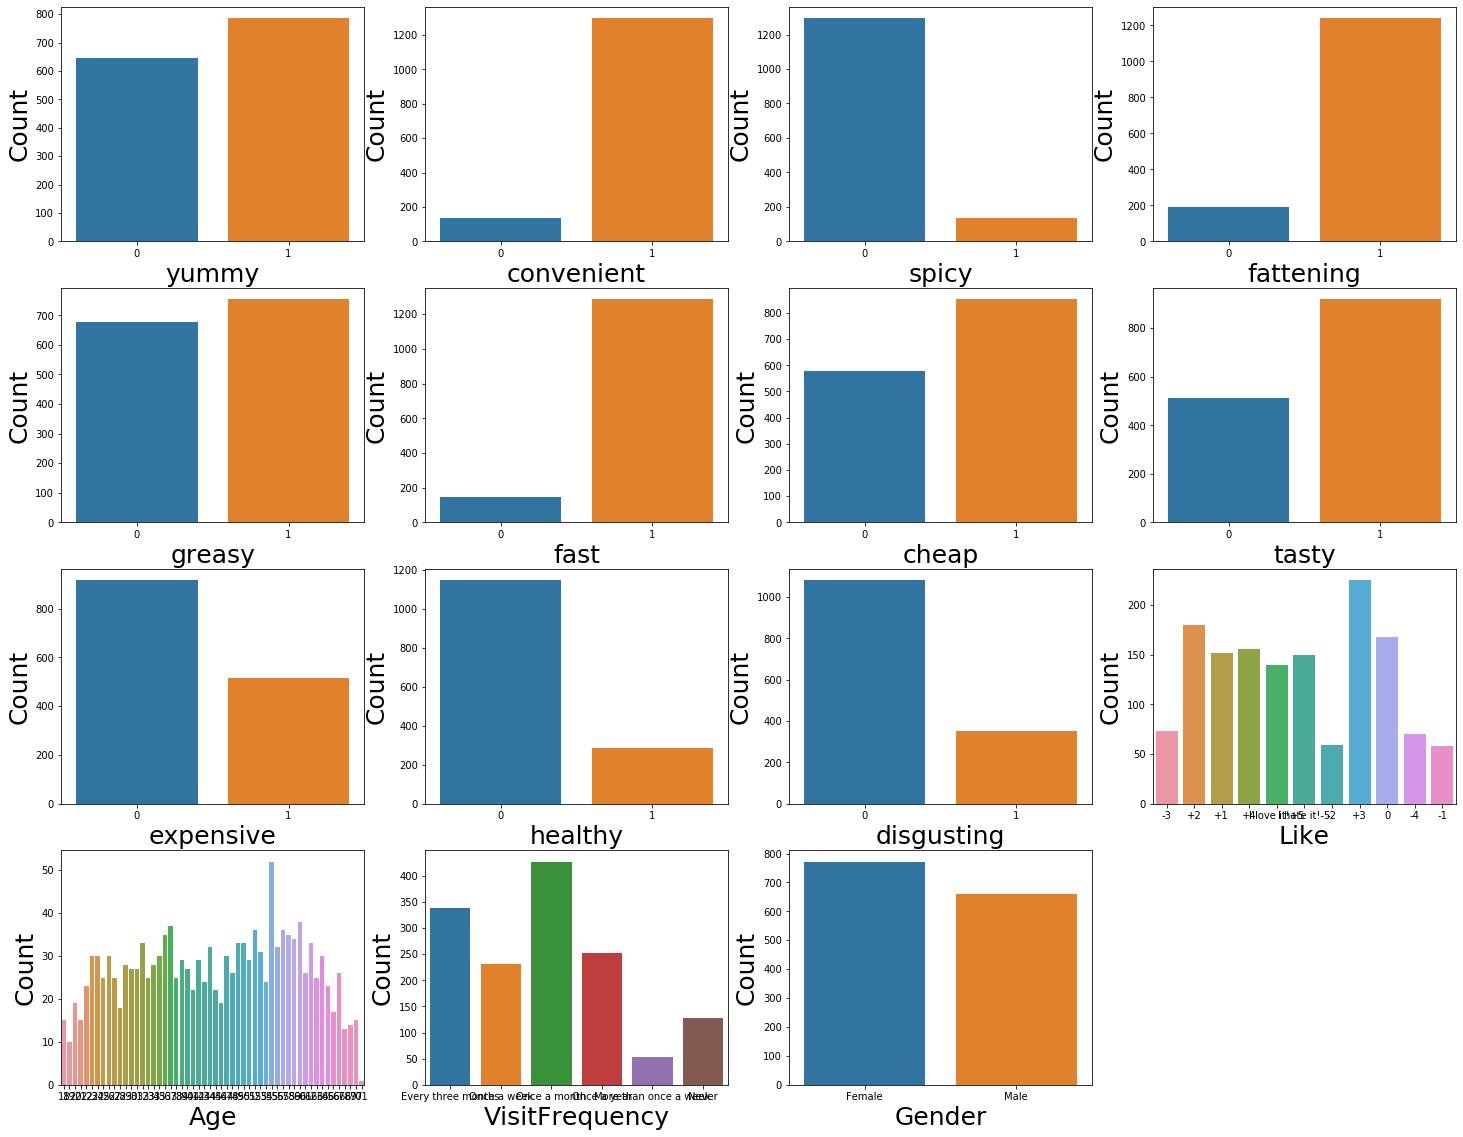

In [109]:
# Visualising the counts of all the variables.
data = data.replace({'Yes':1,'No':0})
import seaborn as sns
plt.figure(figsize = (25,25))
i=1
for x in data.columns:
    plt.subplot(5,4,i)
    sns.countplot(x = x, data = data)
    plt.xlabel(f"{x}",size = 25)
    plt.ylabel("Count",size = 25)
    i+=1
plt.show()



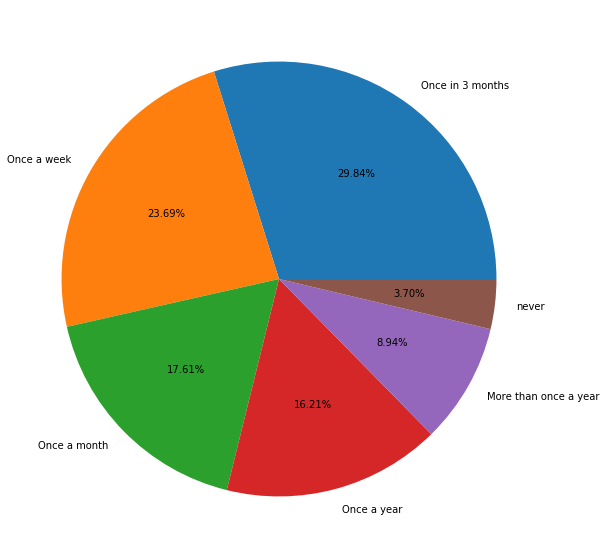

In [110]:
# Visualising the VisitFrequency Variable with a pie chart.
pie_size = data['VisitFrequency'].value_counts()
plt.pie(pie_size,labels = ['Once in 3 months','Once a week','Once a month','Once a year','More than once a year','never'],autopct = '%.2f%%')
plt.show()

In [111]:
# Storing the segmentation variables in a different dataframe.
data2 = data.iloc[:,:11]
data2.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,0.549266,0.907058,0.095038,0.866527,0.526904,0.898672,0.595388,0.642208,0.360587,0.200559,0.244584
std,0.497741,0.290453,0.293371,0.340204,0.499450,0.301868,0.490988,0.479518,0.480339,0.400559,0.429991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Principal Component Analysis

In [112]:
# Doing the principal component analyis of the segmentation variables.
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
dx = pca.fit_transform(data2)
col_names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',]
dx = pd.DataFrame(dx,columns = col_names)
dx

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


<BarContainer object of 11 artists>

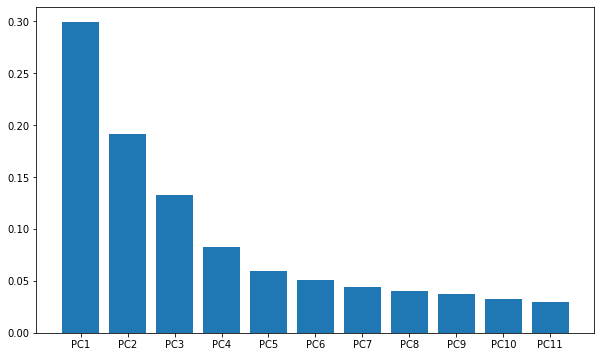

In [113]:
plt.figure(figsize = (10,6))
plt.bar(col_names,pca.explained_variance_ratio_)

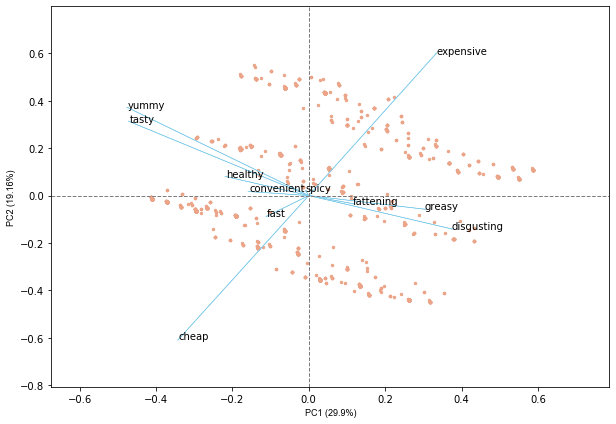

In [114]:
# Plotting the perceptual map of PC1 and PC2
from bioinfokit.visuz import cluster
pca_scores = PCA().fit_transform(data2)
cluster.biplot(cscore =pca_scores,loadings = pca.components_,labels = data2.columns.values,
               var1 = round(pca.explained_variance_ratio_[0]*100,2),var2 = round(pca.explained_variance_ratio_[1]*100,2),
               show = True,dim = (10,7))

# Extracting Segments

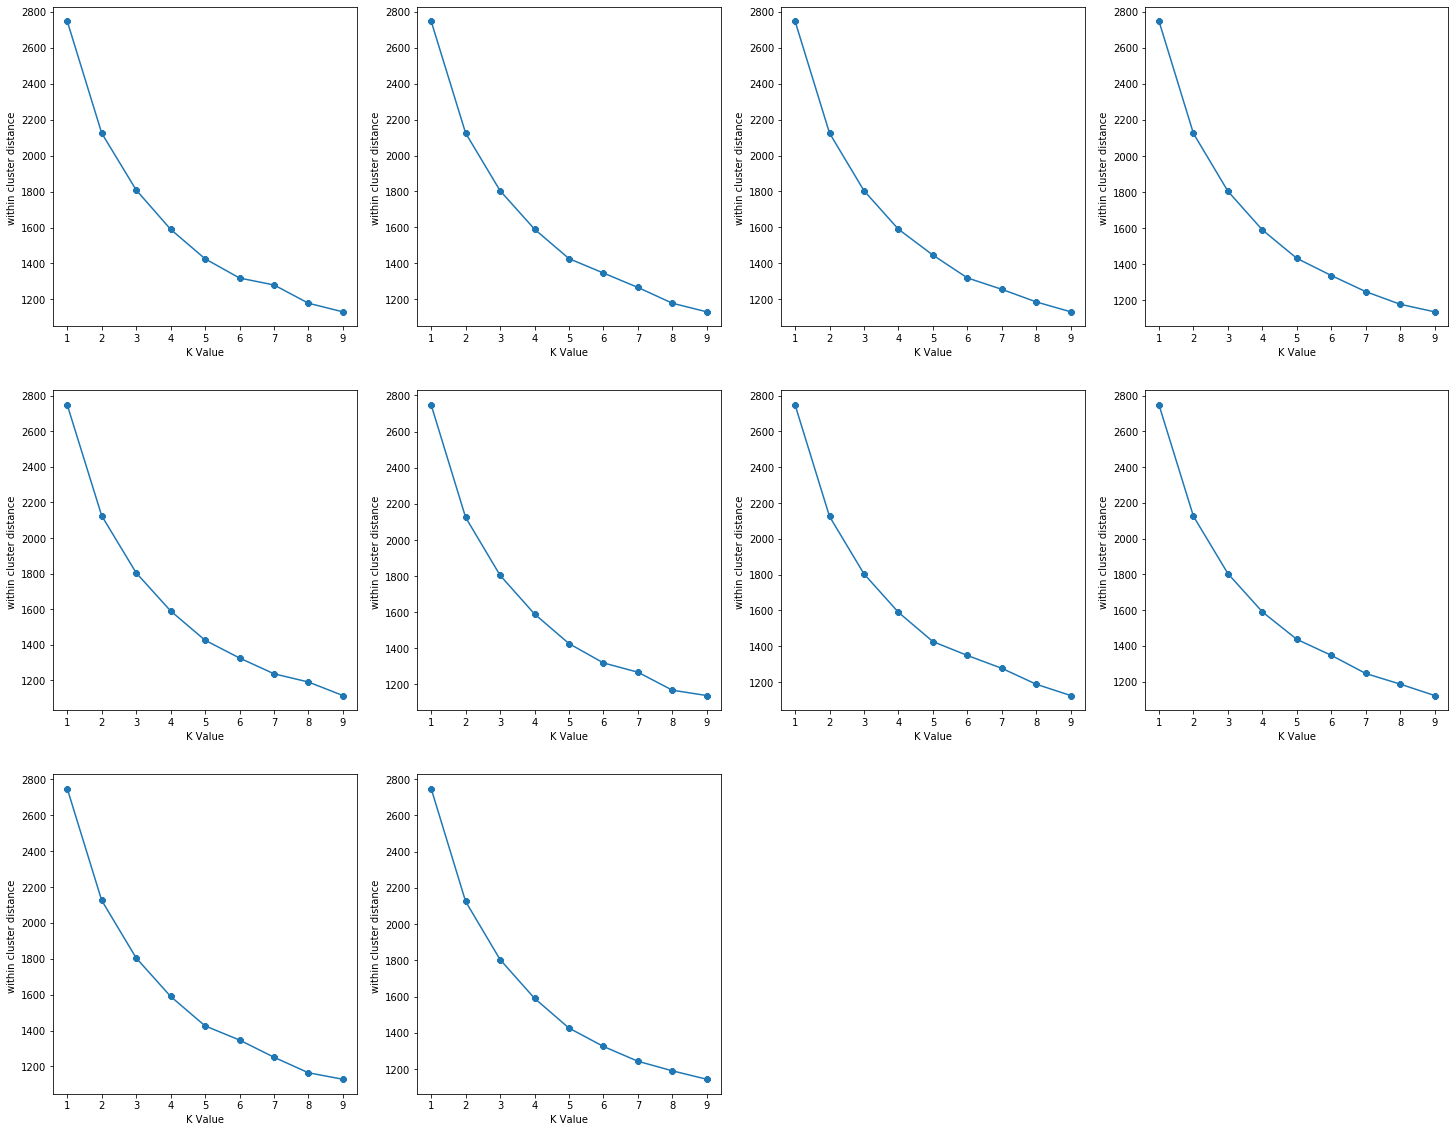

In [115]:
# Choosing the right number of segments using the elbow method for k-means algorithm.
plt.figure(figsize = (25,20))
for j in range(10):
    wdcc = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data2)
        wdcc.append(kmeans.inertia_)
    j+=1
    plt.subplot(3,4,j)
    plt.plot(range(1,10),wdcc,marker = "8")
    plt.xlabel("K Value")
    plt.ylabel("within cluster distance ")
plt.show()

In [151]:
# From the above graphs obtained using elbow method it is clear the the stable required segment is k=4
kmeans = KMeans(n_clusters =4 )
labels = kmeans.fit_predict(data2)
data3 = data2.transpose()
labels

array([3, 2, 2, ..., 2, 0, 1])

C:\Users\Bansidharan\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


<BarContainer object of 11 artists>

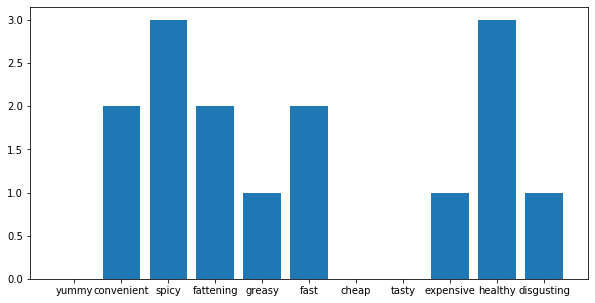

In [152]:
# Now we do hierarchical clustering of the segmentation variables to cluster them into 4 different segments.
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc
from sklearn.metrics import pairwise_distances
clust2 = AgglomerativeClustering(n_clusters = 4).fit_predict(pairwise_distances(data3))
plt.figure(figsize = (10,5))
plt.bar(data2.columns,clust2)

    

# Describing Segments

Like   -5  -4  -3  -2  -1   1   2    3    4   5   0
row_0                                              
0       4   4   2   6  13  65  87  140  107  96  43
1      89  27  30  18  12  13   6    8    0   0  37
2       5   4   7   6   6  41  56   65   47  44  33
3      52  35  34  29  27  33  31   12    2   0  55


<Figure size 1080x1080 with 0 Axes>

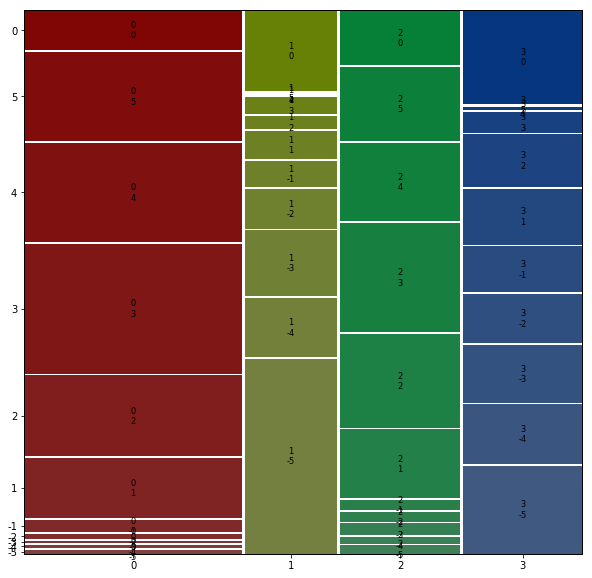

In [153]:
# In the above step we got different clusters and the segmentation variables were divided into these clusters. 
# Segment1 - Yummy, Cheap, tasty. Segment2 - greasy, expensive, disgusting. Segment3 - Convenient, Fattening, fast. Segment4 - Spicy and Healthy.
# Now we will describe the segments by using the descriptor variables.
from statsmodels.graphics.mosaicplot import mosaic
data = data.replace({'I hate it!-5':int(-5),'I love it!+5':int(5),'+1':int(1),'+2':int(2),'+3':int(3),'+4':int(4),'-1':int(-1),'-2':int(-2),'-3':int(-3),'-4':int(-4)})
consumer_likes_per_segment = pd.crosstab(labels,data['Like'])
print(consumer_likes_per_segment)
plt.rcParams['figure.figsize'] = (10,10)
plt.figure(figsize = (15,15))
mosaic(consumer_likes_per_segment.stack())
plt.show()

In [154]:
""" 
From the above information it is clear that Segment 1 and 4 like McDonalds whereas Segment2 dislikes it a lot. 
In Segment 3 there are some people who like it and some who dont.
"""

Gender  Female  Male
row_0               
0          340   227
1          101   139
2          150   164
3          181   129


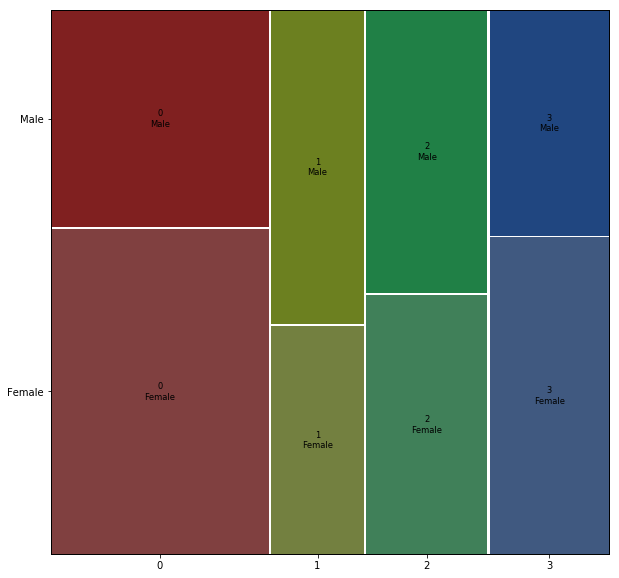

In [155]:
# the code below is used to identify the no of males and females in each segments.
consumer_gender = pd.crosstab(labels,data['Gender'])
print(consumer_gender)
mosaic(consumer_gender.stack())
plt.show()

VisitFrequency  Every three months  More than once a week  Never  \
row_0                                                              
0                              128                     31      6   
1                               56                      1     65   
2                               75                     20      4   
3                               80                      1     53   

VisitFrequency  Once a month  Once a week  Once a year  
row_0                                                   
0                        230          131           41  
1                         33           12           73  
2                        118           66           31  
3                         46           23          107  


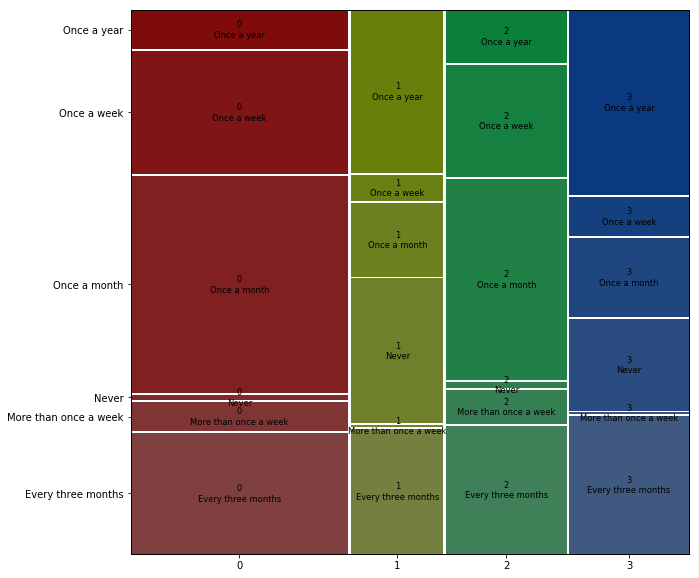

In [156]:
data['VisitFrequency']
labels
consumer_visit = pd.crosstab(labels,data['VisitFrequency'])
print(consumer_visit)
mosaic(consumer_visit.stack())
plt.show()

AgeGroup  Adult  Senior Citizen  Teenager
row_0                                    
0           327             230        10
1           122             114         4
2           224              83         7
3           130             176         4


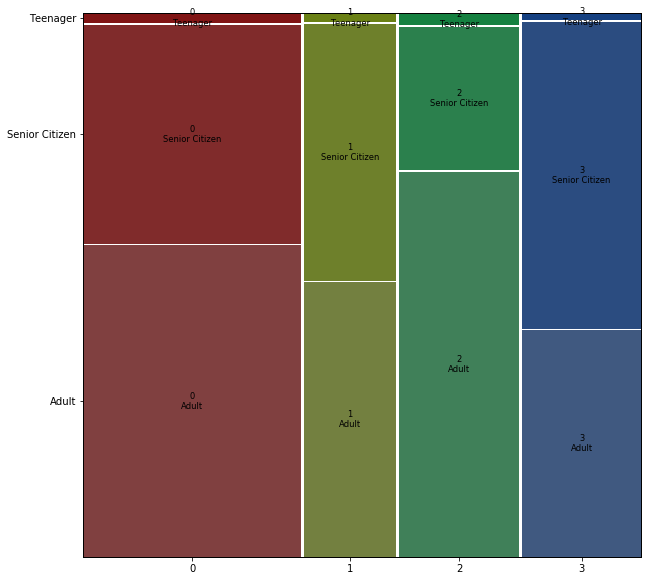

In [157]:
data['AgeGroup'] = None
data.loc[data['Age']<13,'AgeGroup'] = 'Child'
data.loc[(data['Age']<20) &(data['Age']>=13),'AgeGroup'] = 'Teenager'
data.loc[(data['Age']<50) &(data['Age']>=20),'AgeGroup'] = 'Adult'
data.loc[data['Age']>=50,'AgeGroup'] = 'Senior Citizen'
consumer_age = pd.crosstab(labels,data['AgeGroup'])
print(consumer_age)
mosaic(consumer_age.stack())
plt.show()

# Selecting Target Segment

In [158]:
data['Segment'] = labels
data4 = data.copy()
data4['Like'] = data4['Like'].astype('int')
data4.dtypes
from sklearn.preprocessing import MinMaxScaler

likes = data4.groupby('Segment')['Like'].mean()
likes = likes.to_frame()
print(likes)

             Like
Segment          
0        2.645503
1       -2.675000
2        2.152866
3       -1.445161


In [159]:
data4['VisitFrequency'].unique()
data4 = data4.replace({'Never':0,'Once a year':1,'Every three months':2,'Once a month':4,'Once a week':6,'More than once a week':8})
data4['VisitFrequency'] = data4['VisitFrequency'].astype('int')
visits = data4.groupby('Segment')['VisitFrequency'].mean()
visits = visits.to_frame()
print(visits)

         VisitFrequency
Segment                
0              3.970018
1              1.654167
2              3.850318
3              1.925806


In [160]:
# The below code finds the fraction of male users in each segment. Fraction of female users can also be determined by subtracting these values from 1.
data4 = data4.replace({'Male':1,'Female':0})
data4['Gender'] = data4['Gender'].astype('int')
genderFreq = data4.groupby('Segment')['Gender'].mean()
genderFreq = genderFreq.to_frame()
print(genderFreq)

           Gender
Segment          
0        0.400353
1        0.579167
2        0.522293
3        0.416129


In [161]:
segment = genderFreq.merge(likes,on = 'Segment',how = 'left').merge(visits,on = 'Segment',how = 'left')
print(segment)

           Gender      Like  VisitFrequency
Segment                                    
0        0.400353  2.645503        3.970018
1        0.579167 -2.675000        1.654167
2        0.522293  2.152866        3.850318
3        0.416129 -1.445161        1.925806


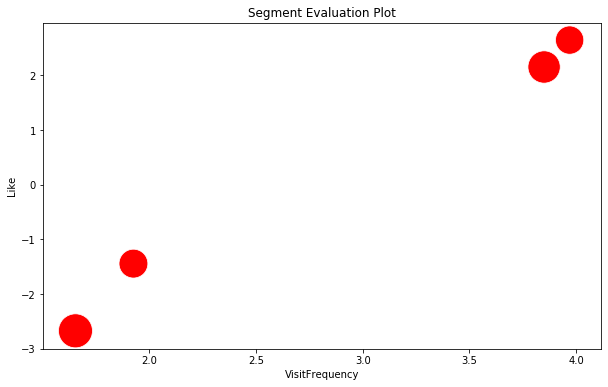

In [162]:
plt.figure(figsize = (10,6))
plt.title('Segment Evaluation Plot')
sns.scatterplot(x = 'VisitFrequency',y = 'Like',data = segment,s = 2000*segment['Gender'],color = 'red')
plt.show()

# Thank You